In [97]:
# !pip install scikit-learn
# !pip install seaborn
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 14.8 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=dc880d68131c7664bc9bedba488d245a2cf06266a234e1ffec270b4dca9fb4a9
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=4ced8e799faf18a7d3fe446fa597605c63a312f437e90d6a227cc0f7294d6496
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import *
from sklearn import metrics
from fancyimpute import KNN

# **Uploading datasets**

In [110]:
train_df = pd.read_csv('https://raw.githubusercontent.com/M-Umr/Product-Sales-Outlet-at-BigMart-Datawarehouse/Muhammad_Umer_MiniProject/Train.csv')

In [66]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# **Data Description**

In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [68]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [69]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Handle Missing Values**

---

1. Replace the numerical columns with median values 
2. For categorical columns, we will drop the missing values


In [111]:
item_weight_median = train_df['Item_Weight'].median()
item_weight_median
train_df['Item_Weight'].replace(np.nan, item_weight_median, inplace=True)
train_df.dropna(inplace=True)

In [71]:
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [72]:
train_df.shape

(6113, 12)

In [73]:
train_df.duplicated().sum()

0

***Check Cutlier***

---

**Train Dataset**
Using boxplot to check if we have outliers or not


<function matplotlib.pyplot.show(*args, **kw)>

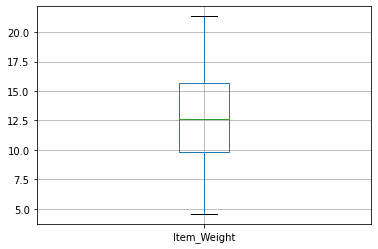

In [112]:
train_df.boxplot(column=['Item_Weight'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

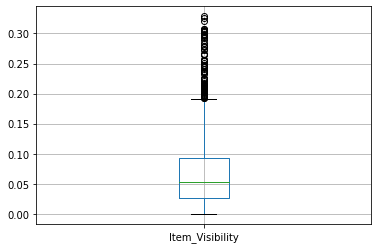

In [113]:
train_df.boxplot(column=['Item_Visibility'])
plt.show

In [115]:
def remove_outlier(col):
  sorted(col)
  q1,q3 = col.quantile([0.25, 0.75])
  iqr = q3-q1
  lower_range = q1-(1.5*iqr)
  upper_range = q1+(1.5*iqr)
  return lower_range,upper_range

In [116]:
#we have outliers
#to remove outliers
low_outlet, upper_outlet = remove_outlier(train_df['Item_Visibility'])
low_outlet, upper_outlet
train_df['Item_Visibility'] = np.where(train_df['Item_Visibility']>upper_outlet,upper_outlet,train_df['Item_Visibility'])
train_df['Item_Visibility'] = np.where(train_df['Item_Visibility']<low_outlet,low_outlet,train_df['Item_Visibility'])

<function matplotlib.pyplot.show(*args, **kw)>

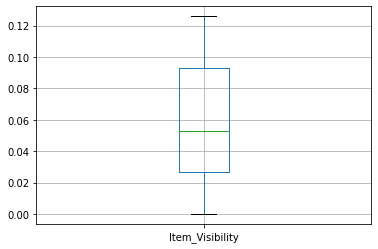

In [117]:
train_df.boxplot(column=['Item_Visibility'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

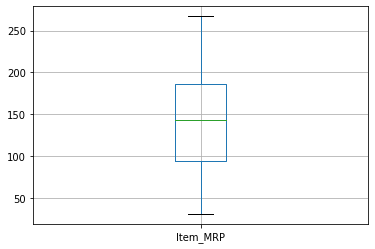

In [118]:
train_df.boxplot(column=['Item_MRP'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

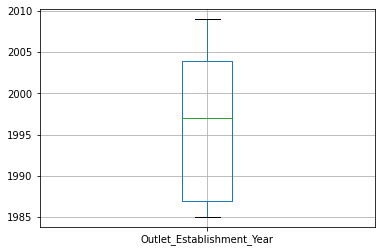

In [119]:
train_df.boxplot(column=['Outlet_Establishment_Year'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

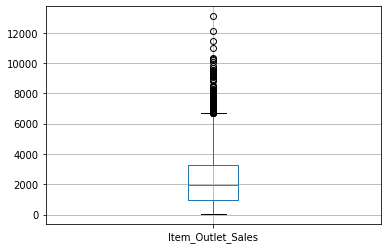

In [120]:
train_df.boxplot(column=['Item_Outlet_Sales'])
plt.show

In [121]:
def remove_outlier(col):
  sorted(col)
  q1,q3 = col.quantile([0.25, 0.75])
  iqr = q3-q1
  lower_range = q1-(1.5*iqr)
  upper_range = q1+(1.5*iqr)
  return lower_range,upper_range

In [122]:
#we have outliers
#to remove outliers
low_outlet, upper_outlet = remove_outlier(train_df['Item_Outlet_Sales'])
low_outlet, upper_outlet
train_df['Item_Outlet_Sales'] = np.where(train_df['Item_Outlet_Sales']>upper_outlet,upper_outlet,train_df['Item_Outlet_Sales'])
train_df['Item_Outlet_Sales'] = np.where(train_df['Item_Outlet_Sales']<low_outlet,low_outlet,train_df['Item_Outlet_Sales'])

<function matplotlib.pyplot.show(*args, **kw)>

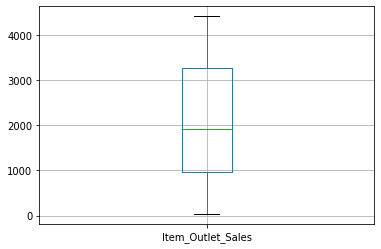

In [123]:
train_df.boxplot(column=['Item_Outlet_Sales'])
plt.show

# **PairPlot**

---

To check which ML algorithm will be best for the Train Dataset

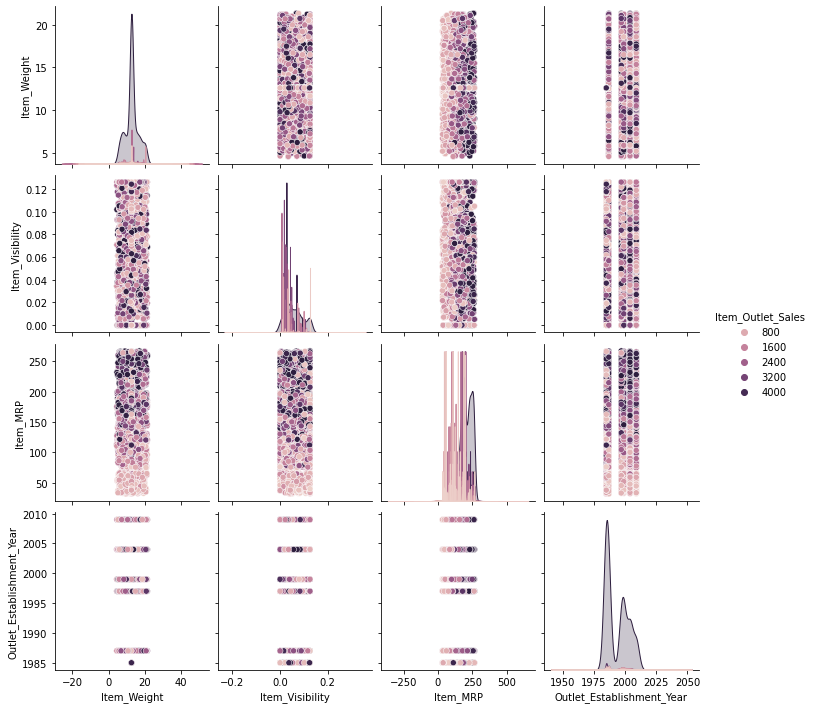

In [124]:
sns.pairplot(train_df, hue='Item_Outlet_Sales')

# **Normalization**

In [125]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [126]:
train_df['Item_Weight'] = std_scale.fit_transform(train_df[['Item_Weight']])
train_df['Item_Visibility'] = std_scale.fit_transform(train_df[['Item_Visibility']])
train_df['Item_MRP'] = std_scale.fit_transform(train_df[['Item_MRP']])
train_df['Outlet_Establishment_Year'] = std_scale.fit_transform(train_df[['Outlet_Establishment_Year']])
train_df['Item_Outlet_Sales'] = std_scale.fit_transform(train_df[['Item_Outlet_Sales']])

In [127]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,-0.865480,Low Fat,-1.094845,Dairy,1.744524,OUT049,0.362550,Medium,Tier 1,Supermarket Type1,1.146214
1,DRC01,-1.694842,Regular,-1.014326,Soft Drinks,-1.494387,OUT018,1.493530,Medium,Tier 3,Supermarket Type2,-1.242971
2,FDN15,1.146583,Low Fat,-1.077082,Meat,0.005804,OUT049,0.362550,Medium,Tier 1,Supermarket Type1,-0.042579
4,NCD19,-0.956268,Low Fat,-1.494769,Household,-1.404516,OUT013,-0.994626,High,Tier 3,Supermarket Type1,-0.842841
5,FDP36,-0.596796,Regular,-1.494769,Baking Goods,-1.444060,OUT018,1.493530,Medium,Tier 3,Supermarket Type2,-1.160819
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,1.944046,reg,0.588838,Frozen Foods,0.603860,OUT046,0.136354,Small,Tier 1,Supermarket Type1,1.054397
8518,FDF22,-1.462964,Low Fat,-0.079638,Snack Foods,1.177427,OUT013,-0.994626,High,Tier 3,Supermarket Type1,0.451785
8520,NCJ29,-0.546494,Low Fat,-0.617872,Health and Hygiene,-0.902126,OUT035,0.928040,Small,Tier 2,Supermarket Type1,-0.698832
8521,FDN46,-1.378311,Regular,1.643127,Snack Foods,-0.612678,OUT018,1.493530,Medium,Tier 3,Supermarket Type2,-0.225248


# **One-Hot Encoding**

**Train Dataset**

In [128]:
# one-hot encoding
df_ohe = pd.get_dummies(train_df)
df_ohe

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.865480,-1.094845,1.744524,0.362550,1.146214,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,-1.694842,-1.014326,-1.494387,1.493530,-1.242971,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1.146583,-1.077082,0.005804,0.362550,-0.042579,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,-0.956268,-1.494769,-1.404516,-0.994626,-0.842841,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
5,-0.596796,-1.494769,-1.444060,1.493530,-1.160819,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,1.944046,0.588838,0.603860,0.136354,1.054397,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
8518,-1.462964,-0.079638,1.177427,-0.994626,0.451785,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8520,-0.546494,-0.617872,-0.902126,0.928040,-0.698832,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,-1.378311,1.643127,-0.612678,1.493530,-0.225248,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [129]:
x = df_ohe.drop(columns='Item_Outlet_Sales', axis=1)
y = df_ohe['Item_Outlet_Sales']

In [130]:
x

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.865480,-1.094845,1.744524,0.362550,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,-1.694842,-1.014326,-1.494387,1.493530,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1.146583,-1.077082,0.005804,0.362550,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,-0.956268,-1.494769,-1.404516,-0.994626,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
5,-0.596796,-1.494769,-1.444060,1.493530,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,1.944046,0.588838,0.603860,0.136354,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
8518,-1.462964,-0.079638,1.177427,-0.994626,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8520,-0.546494,-0.617872,-0.902126,0.928040,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,-1.378311,1.643127,-0.612678,1.493530,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [132]:
print(x.shape, x_train.shape, x_test.shape)

(6113, 1597) (4890, 1597) (1223, 1597)


# **Machine Learning Model Training **

**Random Forest Regressor**

In [133]:
from sklearn.ensemble import RandomForestRegressor

In [134]:
rfg=RandomForestRegressor()

In [135]:
rfg.fit(x_train,y_train)

RandomForestRegressor()

In [136]:
predicted=rfg.predict(x_test)
predicted

array([ 1.61495677, -0.07317392, -0.07974128, ...,  0.42733243,
        0.87857633, -0.00317523])

In [137]:
print("MEAN SQUARED ERROR",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR",mean_absolute_error(y_test,predicted))
print("ROOT MEAN SQUARED",np.sqrt(mean_squared_error(y_test,predicted)))
print("SCORE",rfg.score(x_test,y_test)*100)

MEAN SQUARED ERROR 0.4433934240873812
MEAN ABSOLUTE ERROR 0.48879140753232647
ROOT MEAN SQUARED 0.6658779348254312
SCORE 56.09870762901681


**XGBoost Regressor**

In [138]:
regressor = XGBRegressor()

In [139]:
regressor.fit(x_train, y_train)

[20:54:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

**Model Evaluation**

In [140]:
prediction = regressor.predict(x_train)
r2_train = metrics.r2_score(y_train,prediction)
prediction = regressor.predict(x_test)
r2_test = metrics.r2_score(y_test,prediction)

In [141]:
print('Train Accuracy = ', r2_train*100)
print("Test Accuracy",r2_test*100)

Train Accuracy =  64.91111283532695
Test Accuracy 60.18053056867496


# **KNN Training**

In [142]:
#instantiate both packages to use
encoder = OrdinalEncoder()
imputer = KNN()
# create a list of categorical columns to iterate over
cat_cols = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    train_reshape = nonulls.reshape(-1,1)
    #encode date
    train_ordinal = encoder.fit_transform(train_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(train_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(train_df[columns])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [143]:
# impute data and convert 
encode_df = pd.DataFrame(np.round(imputer.fit_transform(train_df)),columns = train_df.columns)

/usr/local/lib/python3.7/dist-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


Imputing row 1/6113 with 0 missing, elapsed time: 6.844
Imputing row 101/6113 with 0 missing, elapsed time: 6.845
Imputing row 201/6113 with 0 missing, elapsed time: 6.846
Imputing row 301/6113 with 0 missing, elapsed time: 6.847
Imputing row 401/6113 with 0 missing, elapsed time: 6.847
Imputing row 501/6113 with 0 missing, elapsed time: 6.848
Imputing row 601/6113 with 0 missing, elapsed time: 6.848
Imputing row 701/6113 with 0 missing, elapsed time: 6.849
Imputing row 801/6113 with 0 missing, elapsed time: 6.849
Imputing row 901/6113 with 0 missing, elapsed time: 6.849
Imputing row 1001/6113 with 0 missing, elapsed time: 6.849
Imputing row 1101/6113 with 0 missing, elapsed time: 6.850
Imputing row 1201/6113 with 0 missing, elapsed time: 6.850
Imputing row 1301/6113 with 0 missing, elapsed time: 6.851
Imputing row 1401/6113 with 0 missing, elapsed time: 6.853
Imputing row 1501/6113 with 0 missing, elapsed time: 6.853
Imputing row 1601/6113 with 0 missing, elapsed time: 6.853
Imputing 

In [144]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,155.0,-0.865480,1.0,-1.094845,4.0,1.744524,6.0,0.362550,1.0,0.0,1.0,1.146214
1,8.0,-1.694842,2.0,-1.014326,14.0,-1.494387,1.0,1.493530,1.0,2.0,2.0,-1.242971
2,661.0,1.146583,1.0,-1.077082,10.0,0.005804,6.0,0.362550,1.0,0.0,1.0,-0.042579
4,1294.0,-0.956268,1.0,-1.494769,9.0,-1.404516,0.0,-0.994626,0.0,2.0,1.0,-0.842841
5,757.0,-0.596796,2.0,-1.494769,0.0,-1.444060,1.0,1.493530,1.0,2.0,2.0,-1.160819
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,388.0,1.944046,4.0,0.588838,5.0,0.603860,5.0,0.136354,2.0,0.0,1.0,1.054397
8518,369.0,-1.462964,1.0,-0.079638,13.0,1.177427,0.0,-0.994626,0.0,2.0,1.0,0.451785
8520,1354.0,-0.546494,1.0,-0.617872,8.0,-0.902126,4.0,0.928040,2.0,1.0,1.0,-0.698832
8521,680.0,-1.378311,2.0,1.643127,13.0,-0.612678,1.0,1.493530,1.0,2.0,2.0,-0.225248


In [145]:
encode_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,155.0,-1.0,1.0,-1.0,4.0,2.0,6.0,0.0,1.0,0.0,1.0,1.0
1,8.0,-2.0,2.0,-1.0,14.0,-1.0,1.0,1.0,1.0,2.0,2.0,-1.0
2,661.0,1.0,1.0,-1.0,10.0,0.0,6.0,0.0,1.0,0.0,1.0,-0.0
3,1294.0,-1.0,1.0,-1.0,9.0,-1.0,0.0,-1.0,0.0,2.0,1.0,-1.0
4,757.0,-1.0,2.0,-1.0,0.0,-1.0,1.0,1.0,1.0,2.0,2.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6108,388.0,2.0,4.0,1.0,5.0,1.0,5.0,0.0,2.0,0.0,1.0,1.0
6109,369.0,-1.0,1.0,-0.0,13.0,1.0,0.0,-1.0,0.0,2.0,1.0,0.0
6110,1354.0,-1.0,1.0,-1.0,8.0,-1.0,4.0,1.0,2.0,1.0,1.0,-1.0
6111,680.0,-1.0,2.0,2.0,13.0,-1.0,1.0,1.0,1.0,2.0,2.0,-0.0


In [146]:
x = encode_df.drop(columns='Item_Outlet_Sales', axis=1)
y = encode_df['Item_Outlet_Sales']

In [147]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [148]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [149]:
knn.predict(x_test)

array([ 1., -0., -1., ..., -1., -1., -1.])

In [150]:
print("SCORE",knn.score(x_test,y_test)*100)

SCORE 38.43008994276369
